In [125]:
#Importando bibliotecas 
import pandas as pd
import matplotlib.pyplot as plt
import locale
locale.setlocale( locale.LC_ALL, 'pt-br.UTF-8' )


'pt-br.UTF-8'

In [70]:
#Lendo o arquivo csv
df = pd.read_csv("Data.csv")

#Head
df.head()

,Unnamed: 0,Data_da_Compra,Mes,Faturamento
0,0,2023-01-01,2023-01,1893.892583
1,1,2023-01-02,2023-01,3577.194422
2,2,2023-01-03,2023-01,3455.024639
3,3,2023-01-04,2023-01,5246.888271
4,4,2023-01-05,2023-01,6242.445699


In [71]:
#Arrendondando o valor de Faturamento 
df['Faturamento'] = df['Faturamento'].round(2)

#Vendo os dados
df.head()

,Unnamed: 0,Data_da_Compra,Mes,Faturamento
0,0,2023-01-01,2023-01,1893.89
1,1,2023-01-02,2023-01,3577.19
2,2,2023-01-03,2023-01,3455.02
3,3,2023-01-04,2023-01,5246.89
4,4,2023-01-05,2023-01,6242.45


In [72]:
#Convertendo a data para datetime
df['Data_da_Compra'] = pd.to_datetime(df['Data_da_Compra'])

In [73]:
#Criando coluna de Dia
df['Month'] = df['Data_da_Compra'].dt.month

In [110]:
#Agrupando por mês
GB_Month = df.groupby(['Month']).agg({'Faturamento':'sum'}).reset_index()

#Vendo os dados
GB_Month.head()

,Month,Faturamento
0,1,743632.72
1,2,662863.42
2,3,722590.06
3,4,74343.00


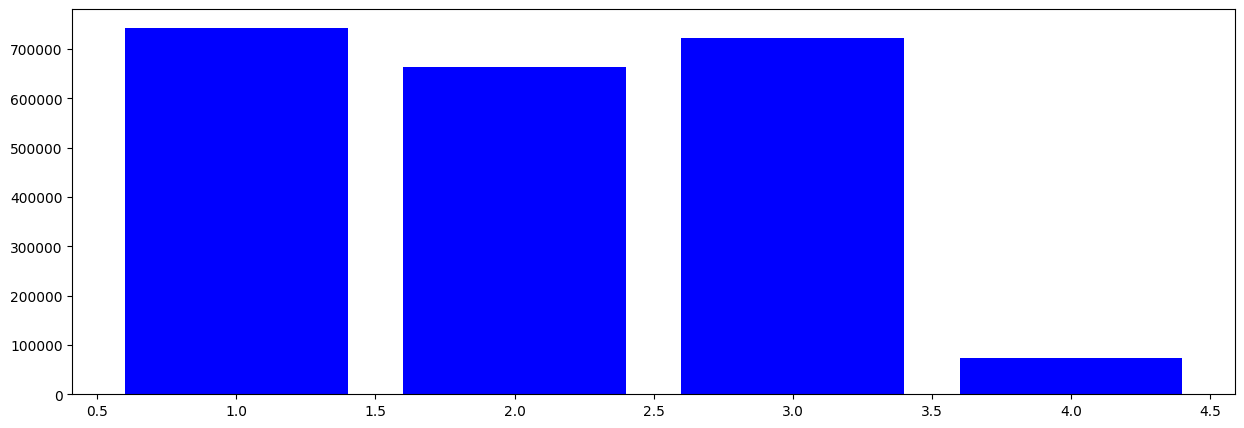

In [111]:
#Fazendo gráfico de linha
fig = plt.figure(figsize=(15, 5))

plt.bar(GB_Month['Month'], GB_Month['Faturamento'], color='b')

plt.show()

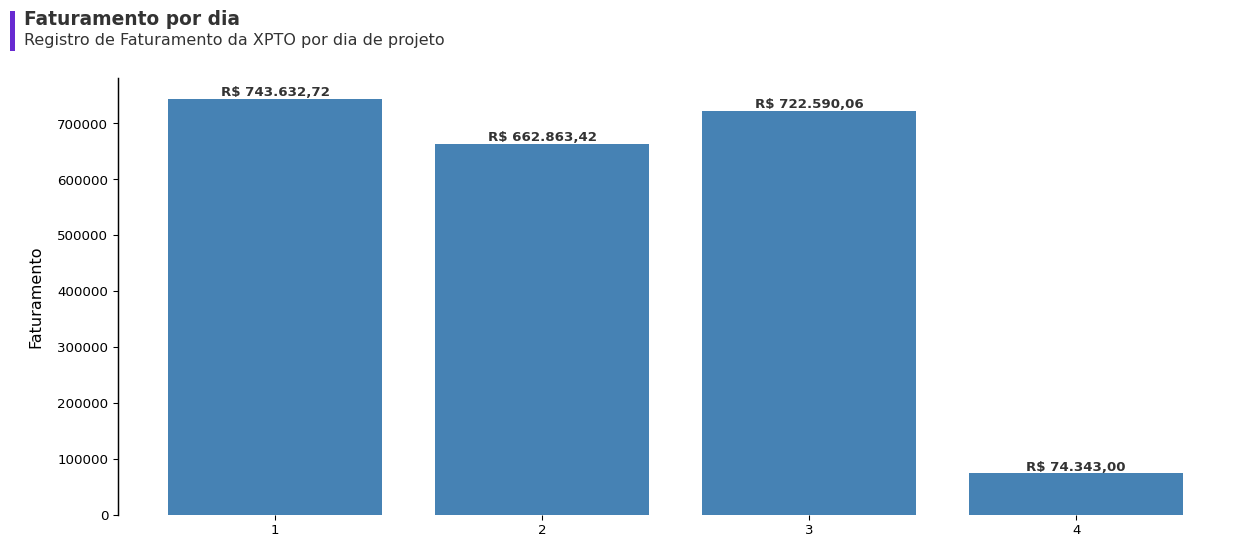

In [127]:
fig, ax = plt.subplots(figsize=(15, 7), dpi=96)

#Criando o gráfico de barras em si
ax.bar(GB_Month['Month'], GB_Month['Faturamento'], color='steelblue')

#Ajustando margins
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85, wspace=None, hspace=None)

####### X & Y Axis #######
#Reformando o x-axis com labes 
ax.set_xlabel("", fontsize=12, labelpad=10)
ax.xaxis.set_label_position("bottom")
ax.set_xticks(GB_Month['Month'])

#Colocando e reformando o y-axis 
ax.set_ylabel("Faturamento", fontsize=12, labelpad=10)
ax.yaxis.set_label_position("left")

#Retirando as bordas do gráfico 
ax.spines[['top', 'right', 'bottom']].set_visible(False)

#Aumentando a grossura da borda da esquerda 
ax.spines['left'].set_linewidth(1.1)


#### TITULO E DETALHES ####
#Adicionando título 
ax.text(x=0.06, y=.93, s='Faturamento por dia', transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
#Adicionando subtítulo 
ax.text(x=0.06, y=.90, s='Registro de Faturamento da XPTO por dia de projeto', transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

#Adicionando o retangulo antes do título e subtítulo
ax.add_patch(plt.Rectangle((0.05,.95), 0.004, -0.06, facecolor='#672ad1', transform=fig.transFigure, clip_on=False, linewidth = 0))

#Adicionando rótulo de dados 
for i in range(len(GB_Month['Month'])):
    value = locale.currency(GB_Month['Faturamento'][i], grouping=True)
    ax.text(x=GB_Month['Month'][i], y=GB_Month['Faturamento'][i], s=value, ha='center', va='bottom', fontsize=10, weight='bold', alpha=.8)

